**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

Pertama mengimport pandas, numpy, matplotlib.pyplot, seaborn, math, dan datetime

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/jimschacko/tesla-inc-last-5-years-stock-historical-data

In [2]:
# https://drive.google.com/file/d/1lYvpVh8SAzxHwjSSAGSQULCs_A-LvLHd/view?usp=sharing

!gdown 1lYvpVh8SAzxHwjSSAGSQULCs_A-LvLHd

Downloading...
From: https://drive.google.com/uc?id=1lYvpVh8SAzxHwjSSAGSQULCs_A-LvLHd
To: /content/TSLA Testing.csv
100% 19.0k/19.0k [00:00<00:00, 68.1MB/s]


mengimport dataset yang kita pilih di kaggle. Dataset yang saya pilih yaitu TESLA Inc Last 5 Years Stock Historical Data

In [3]:
train_data = pd.read_csv('TSLA Testing.csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-22,234.503326,246.833328,233.826660,236.086670,236.086670,101107500
1,2022-06-23,237.906662,239.316666,228.636673,235.070007,235.070007,104202600
2,2022-06-24,237.470001,246.066666,236.086670,245.706665,245.706665,95770800
3,2022-06-27,249.366669,252.070007,242.566666,244.919998,244.919998,89178300
4,2022-06-28,244.483337,249.970001,232.343338,232.663330,232.663330,90391200


Kodingan ini menampilkan data dari tesla selama 5 tahun terakhir. Dalam kodingan ini diantaranya menampilkan data seperti date, open, high, low, close, adj close, dan volume.

Check missing values

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


Kodingan ini memastikan bahwa di data apakah ada data yang missing value atau tidak ada. Pada data ini tidak ada missing karena dari panjang data tidak adanya perbedaan.

Check statistic vales for every features

In [5]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,210.688220,215.466162,205.595405,210.655936,210.655936,1.208421e+08
std,51.496805,52.164593,50.789028,51.421134,51.421134,4.971209e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,176.635002,182.419998,172.504998,178.474998,178.474998,8.141040e+07
50%,198.539993,203.000000,192.889999,197.580002,197.580002,1.102522e+08
75%,247.361671,251.520004,241.084999,245.224998,245.224998,1.569024e+08
max,311.666656,314.666656,305.579987,309.320007,309.320007,3.065906e+08


Kodingan ini mengecek seperti mean, standard deviasi, dan lain-lain

Handle datetime data for time series

In [6]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-22,234.503326,246.833328,233.826660,236.086670,236.086670,101107500
2022-06-23,237.906662,239.316666,228.636673,235.070007,235.070007,104202600
2022-06-24,237.470001,246.066666,236.086670,245.706665,245.706665,95770800
2022-06-27,249.366669,252.070007,242.566666,244.919998,244.919998,89178300
2022-06-28,244.483337,249.970001,232.343338,232.663330,232.663330,90391200


Kodingan ini memasukkan date ke datetime agar jadi ke dalam format datetime dan menjadikan date atau hari, tanggal, dan tahun sebagai index.

**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

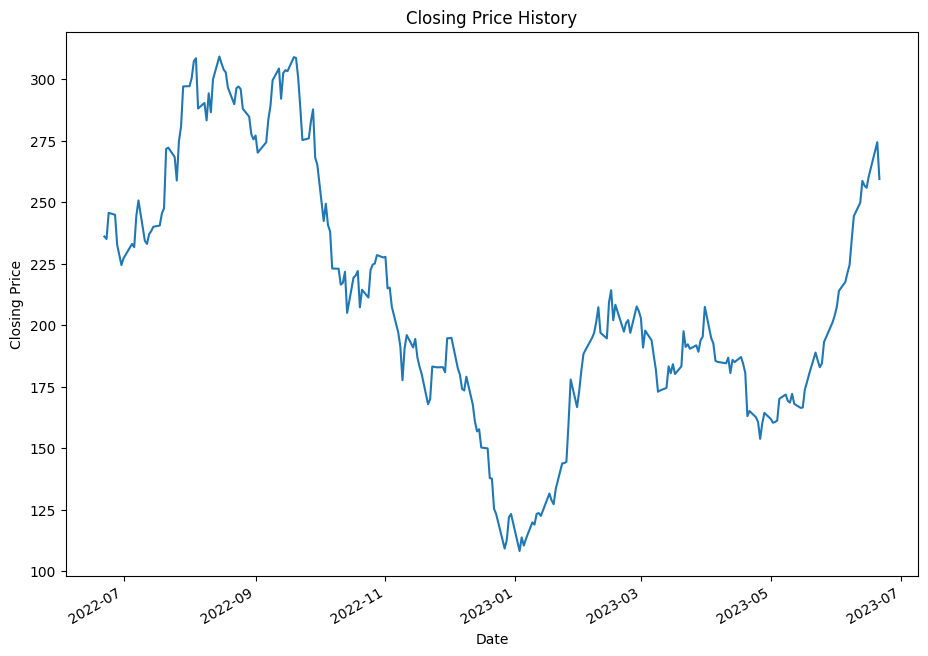

In [7]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

Kodingan ini menunjukkan closing price history. Data Tesla selama 5 tahun terakhir mengalami kenaikan pada tahun 2022 bulan september dan selanjutnya mengalami penurunan sampai tahun 2023 bulan Januari dan selanjutnya mengalami kenaikan sampai tahun 2023 bulan Juli. Selama 5 tahun terakhir bisa dikatakan mengalami kenaikan.

<Figure size 1600x800 with 0 Axes>

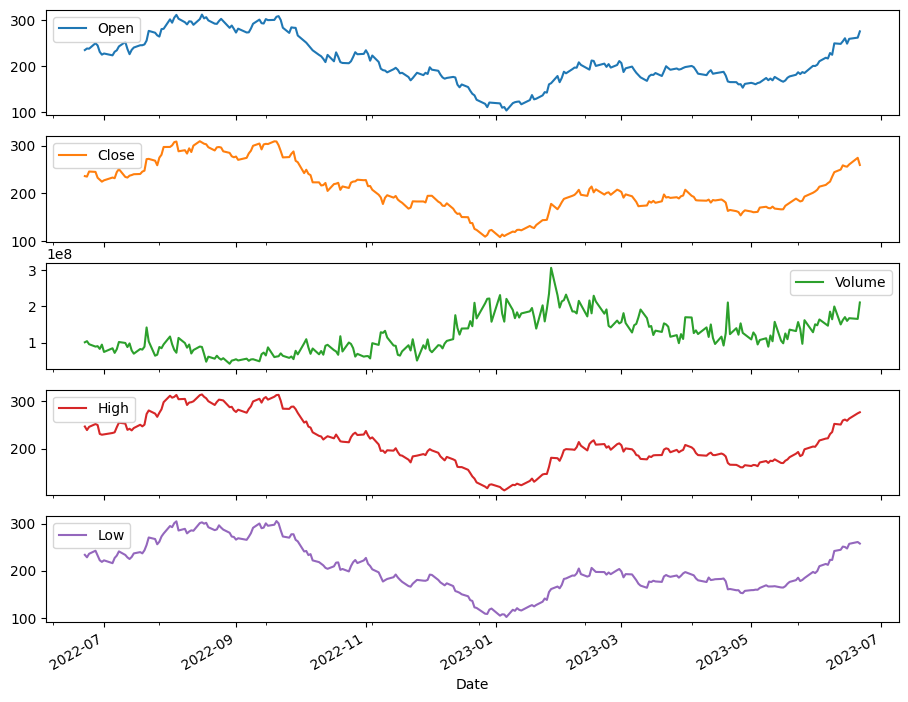

In [8]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

kodingan ini menampilkan grafik dari tiap fitur dari mulai open, close, volume, high, dan low. Dari fitur open, close, high, dan low diatas dapat dikatakan mengalami kecenderungan nurun pada tahun 2023 awal dan selanjutnya memiliki trend kenaikan sampai 2023 bulan Juli.

In [9]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

Kodingan ini bikin fitur yang akan digunakan dalam membaca harga tertinggi dan terendah memiliki persentase.

In [10]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

Input fitur baru tadi kedalam datasets

In [11]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

13


<ipython-input-11-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


Membuat harga penutupan Tesla sebagai label untuk memprediksi harga tesla pada hari itu

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

Menggunakan library sklearn untuk membuat model algoritma data

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

In [13]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-13-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


Menggunakan scaler untuk menormalisasikan data agar range data tidak terlalu jauh

In [14]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [15]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-15-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Slicing data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Splitting dataset untuk test data

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In [18]:
lr_confidence

0.6154119147359915

In [19]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

In [20]:
rf_confidence

0.6567149106561166

In [21]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-21-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-21-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-21-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

Menggambarkan langkah melakukan prediksi data masa depan

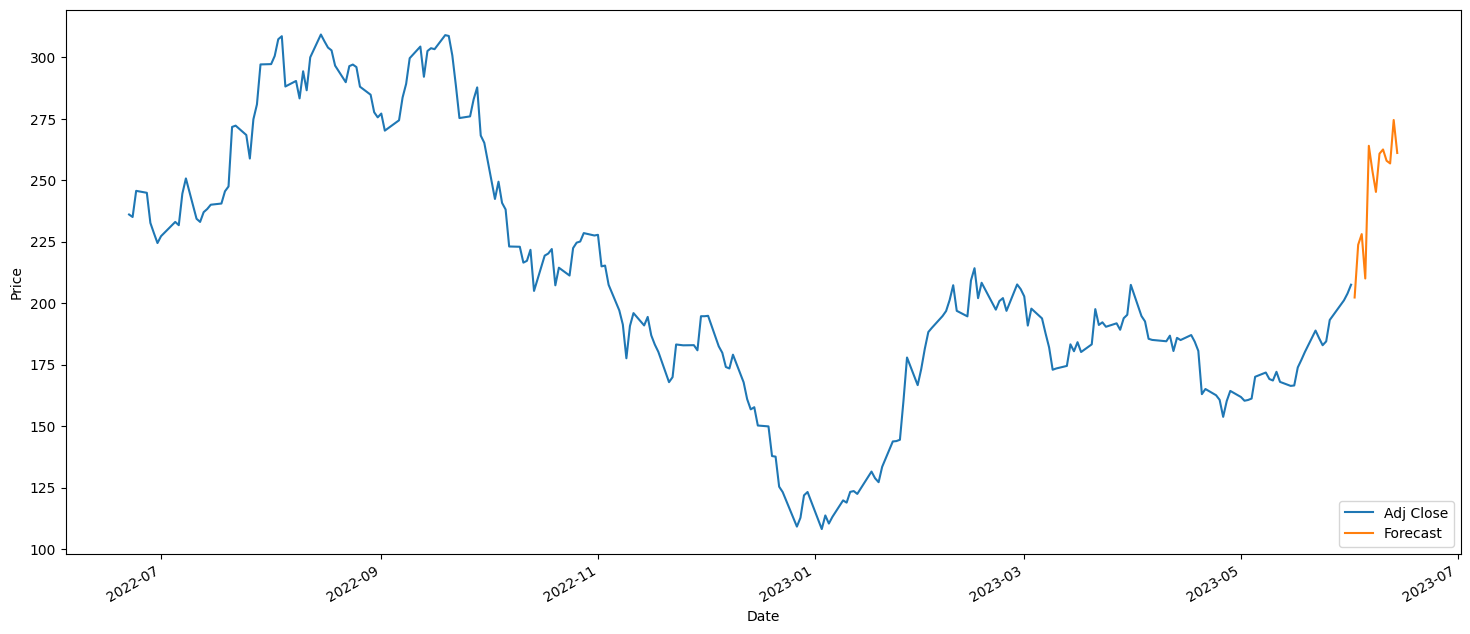

In [22]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Prediksi Selanjutnya digambar dengan warna oren